# Artificial Neural Networks

In this exercise, several parts of the code are missing,  which should be completed by you. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import sklearn
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn.metrics import accuracy_score
sns.set()

%matplotlib inline

## Implement a neural network from scratch

### Activation function
We start by implementing the activation functions

In [2]:
class ActivationFunction:
    def compute_value(self, z):
        raise NotImplementedError()

    def compute_derivative(self, z):
        raise NotImplementedError()

> Implement the Sigmoid function

In [3]:
class Sigmoid(ActivationFunction):
    def compute_value(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def compute_derivative(self, z):
        s = self.compute_value(z)
        return s * (1 - s)

In [4]:
class Sigmoid(ActivationFunction):
    def compute_value(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def compute_derivative(self, z):
        s = self.compute_value(z)
        return s * (1 - s)

We will also use the tangens hyperbolicus activation function that returns a value between -1 and 1.

In [5]:
class Tanh(ActivationFunction):
    def compute_value(self, z):
        return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

    def compute_derivative(self, z):
        return 1 - self.compute_value(z) ** 2

### Cost function

We are going to use the binary cross entropy cost function.
> Implement the binary cross entropy function

In [6]:
class BinaryCrossEntropy(ActivationFunction):
    def compute_value(self, y, y_pred):
        n = y.shape[0]
        cost = -(1.0 / n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def compute_derivative(self, y, y_pred):
        return (y_pred - y) / (y_pred * (1-y_pred))

In [7]:
class BinaryCrossEntropy:
    def compute_value(self, y, y_pred):
        n = y.shape[0]
        cost = -(1.0 / n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def compute_derivative(self, y, y_pred):
        return (y_pred - y) / (y_pred * (1-y_pred))
    


### Layer Class

In [8]:
class Layer:
    def __init__(self, nunits, nunits_prev, activ_func):
        """
        Instantiates a fully connected layer for an MLP, with given number of input and output activations.

        Arguments:
        nunits -- number of units in the given layer.
        nunits_prev -- number of units in the previous layer (= number of input activations).
        activ_func -- activation function to be used (with a `compute_value`- and `compute_derivative`-method).
        """
        self.nunits = nunits
        self.nunits_prev = nunits_prev
        self.activ_func = activ_func

        self.weights = None  # shape (nunits,nunits_prev)
        self.bias = None  # shape (nunits,1)
        self.logits = None  # z-values, shape(nunits,m) - will be needed for the backprop part ...
        self.activations = None  # shape(nunits,m)
        self.grad_logits = None  # grad w.r.t. z, shape(nunits,m) - will be needed as basis for different gradients

    def initialize(self):
        """
        Initializes the weights and biases. It uses Xavier normalisation.
        """
        sigmaw = np.sqrt(2.0 / (self.nunits + self.nunits_prev))  # suited for sigmoid activation function
        sigmab = np.sqrt(1.0 / self.nunits)
        self.weights = np.random.normal(size=(self.nunits, self.nunits_prev), loc=0.0, scale=sigmaw)
        self.bias = np.random.normal(size=(self.nunits, 1), loc=0.0, scale=sigmab)

    def propagate(self, activations_prev):
        pass


    def backpropagate(self, grad_activations):
        pass


    def gradient_weights(self, activations_prev):
        pass
 

    def gradient_bias(self):
        pass


#### Propagate function
It computes the activations of the layer given the activations of the previous layer.
        It also caches the computed logits (z-values) and activations $a^{[l]}$ since the values will be needed
        when using backpropagation to compute the gradients w.r.t. weigths $W$ and biases $b$.
> Implement the propagate function

In [9]:
class Layer(Layer):
    def propagate(self, activations_prev):
        """
        Arguments:
        activations_prev -- activations of the previous layer (or input layer). A numpy array of shape
        (nunits_prev,m).

        Returns:
        activations -- activations of this layer, a numpy array of shape (nunits,m)
        """
        ### START YOUR CODE ###
        self.logits = self.weights.dot(activations_prev) + self.bias
        self.activations = self.activ_func.compute_value(self.logits)
        return self.activations
        ### END YOUR CODE ###

In [10]:
class Layer(Layer):
    def propagate(self, activations_prev):
        """
        Arguments:
        activations_prev -- activations of the previous layer (or input layer). A numpy array of shape
        (nunits_prev,m).

        Returns:
        activations -- activations of this layer, a numpy array of shape (nunits,m)
        """
        ### START YOUR CODE ###
        self.logits = self.weights.dot(activations_prev) + self.bias
        self.activations = self.activ_func.compute_value(self.logits)
        return self.activations
        ### END YOUR CODE ###

#### Backpropagate function
It computes the gradient of the cost w.r.t. to the input activations (activations of the previous
        layer $a^{[l-1]}$) of the given layer. It also computes the gradient w.r.t. the logits (z-values) of
        the given layer. This will be needed as the basis for computing the gradient of the cost w.r.t.
        the weights $W$ and bias $b$ of the given layer.

The method assumes that the forward propagation (`propagate`) has been invoked for the given training sample
        so that consistent logit-values (self.logits) and activations (self.activations) are available.
> Implement the backpropagate function

In [11]:
class Layer(Layer):
    def backpropagate(self, grad_activations):
        """
        Arguments:
        grad_activations -- gradient of the cost w.r.t. to the output activations of the given layer (a^[l]).
        A numpy array of shape (nunits_prev,m)

        Returns:
        grad_activations_prev -- gradient of the cost w.r.t. to the input activations of the given layer.
        """
        nsamples = self.logits.shape[1]
        self.grad_logits = grad_activations * self.activ_func.compute_derivative(self.logits)
        grad_activations_prev = self.weights.T.dot(self.grad_logits)
        return grad_activations_prev

In [12]:
class Layer(Layer):
    def backpropagate(self, grad_activations):
        """
        Arguments:
        grad_activations -- gradient of the cost w.r.t. to the output activations of the given layer (a^[l]).
        A numpy array of shape (nunits_prev,m)

        Returns:
        grad_activations_prev -- gradient of the cost w.r.t. to the input activations of the given layer.
        """
        nsamples = self.logits.shape[1]
        self.grad_logits = grad_activations * self.activ_func.compute_derivative(self.logits)
        grad_activations_prev = self.weights.T.dot(self.grad_logits)
        return grad_activations_prev

#### Gradient functions
The gradient functions are used to compute the gradients w.r.t the weights $W$ and the bias $b$ of the given layer and for the given input samples.
> implement the gradient functions

In [13]:
class Layer(Layer):
    def gradient_weights(self, activations_prev):
        """
        Arguments:
        activations_prev -- activations of the previous layer (or input layer). A numpy array of shape
        (nunits_prev,m).

        Returns:
        grad_weights -- the gradient w.r.t. to the weights. A numpy array of shape (nunits, nunits_prev).
        """
        ### START YOUR CODE ###
        nsamples = self.logits.shape[1]
        grad_weights = self.grad_logits.dot(activations_prev.T) / nsamples
        return grad_weights
        ### END YOUR CODE ###

    def gradient_bias(self):
        """
        Returns:
        grad_bias -- the gradient w.r.t. to the bias. A numpy array of shape (nunits, 1).
        """
        ### START YOUR CODE ###
        grad_bias = np.mean(self.grad_logits, axis=1).reshape(self.nunits, 1)
        np.testing.assert_equal(grad_bias.shape, (self.nunits, 1))
        return grad_bias
        ### END YOUR CODE ###

In [14]:
class Layer(Layer):
    def gradient_weights(self, activations_prev):
        """
        Arguments:
        activations_prev -- activations of the previous layer (or input layer). A numpy array of shape
        (nunits_prev,m).

        Returns:
        grad_weights -- the gradient w.r.t. to the weights. A numpy array of shape (nunits, nunits_prev).
        """
        ### START YOUR CODE ###
        nsamples = self.logits.shape[1]
        grad_weights = self.grad_logits.dot(activations_prev.T) / nsamples
        return grad_weights
        ### END YOUR CODE ###

    def gradient_bias(self):
        """
        Returns:
        grad_bias -- the gradient w.r.t. to the bias. A numpy array of shape (nunits, 1).
        """
        ### START YOUR CODE ###
        grad_bias = np.mean(self.grad_logits, axis=1).reshape(self.nunits, 1)
        np.testing.assert_equal(grad_bias.shape, (self.nunits, 1))
        return grad_bias
        ### END YOUR CODE ###

### MLP Class

We implement an `MLP` class that can have multiple layers. 

In [15]:
class MLP:
    def __init__(self, layers, cost):
        self.layers = layers
        self.x = None  # input data for one iteration (propagate and backpropagate)
        self.cost = cost

    def initialize(self):
        """
        Calls the `initialize`-method of the layers which are used to properly initialize the weights and biases.
        """
        for layer in self.layers:
            layer.initialize()
            
    def propagate(self, x):
        pass
    
    def predict(self, x):
         pass
    
    def update_params(self, learning_rate):
        pass
    
    def fit(self, X, y, num_epochs, learning_rate):
        pass


#### Propagate function
It computes the output of the MLP for given input (by using the propagate-method). By executing this method on a given input, the activations and the logits of all the layers are computed and cached.
> Implement the propage function.

In [16]:
class MLP(MLP):
    def propagate(self, x):
        """
        Arguments:
        x -- input of shape (n_0,m)

        Returns:
        a -- activations of the last layer of shape (n_L,m)
        """
        self.x = x
        a = x
        for layer in self.layers:
            a = layer.propagate(a)
        return a

    def predict(self, x):
        return self.propagate(x)

In [17]:
class MLP(MLP):
    def propagate(self, x):
        """
        Arguments:
        x -- input of shape (n_0,m)

        Returns:
        a -- activations of the last layer of shape (n_L,m)
        """
        self.x = x
        a = x
        for layer in self.layers:
            a = layer.propagate(a)
        return a

    def predict(self, x):
        return self.propagate(x)

#### Backpropate function
It executes backpropagation for the given MLP (after having executed the `propagate`-method). It starts with passing in the gradient of the cost w.r.t. the activations of the last layer
        (i.e. the input to the cost function) and ends up with the gradient of the cost w.r.t. the
        input to the first layer (e.g. input x). Once this method has been run, the gradients w.r.t.
        to the logits (z-values) are computed and cached. These will be used to update the weights $W$
        and biases $b$ in accordance with the gradient descent principle.
        
> Implement the backpropage function. 


In [18]:
class MLP(MLP):
    def backpropagate(self, grady):
        """
        Arguments:
        grady -- gradient with respect to the output of the network, i.e. the activations of the last layer
        that is input to the cost function. A numpy array of shape (n_L,m)

        Returns:
        gradient with respect to the inputs to the network. A numpy array of shape (n_0,m)
        """
        grad = grady
        for layer in reversed(self.layers):
            grad = layer.backpropagate(grad)
        return grad

In [19]:
class MLP(MLP):
    def backpropagate(self, grady):
        """
        Arguments:
        grady -- gradient with respect to the output of the network, i.e. the activations of the last layer
        that is input to the cost function. A numpy array of shape (n_L,m)

        Returns:
        gradient with respect to the inputs to the network. A numpy array of shape (n_0,m)
        """
        grad = grady
        for layer in reversed(self.layers):
            grad = layer.backpropagate(grad)
        return grad

#### Update params function
It updates the weights and biases of all the layers consistent with the gradient descent principle.
        It assumes that the propagate and backpropagate methods have been executed.
        
> Implement the update_params function

In [20]:
class MLP(MLP):
    def update_params(self, learning_rate):
        """
        Arguments:
        learning_rate -- learning rate to be used in the update rule.
        """
        ### START YOUR CODE ###
        a = self.x
        for layer in self.layers:
            layer.weights -= learning_rate * layer.gradient_weights(a)
            layer.bias -= learning_rate * layer.gradient_bias()
            a = layer.activations
        ### END YOUR CODE ###

In [21]:
class MLP(MLP):
    def update_params(self, learning_rate):
        """
        Arguments:
        learning_rate -- learning rate to be used in the update rule.
        """
        ### START YOUR CODE ###
        a = self.x
        for layer in self.layers:
            layer.weights -= learning_rate * layer.gradient_weights(a)
            layer.bias -= learning_rate * layer.gradient_bias()
            a = layer.activations
        ### END YOUR CODE ###

#### Fit function
The `fit` function loops through the number of epochs and applies the gradient descent algorithm.

In [22]:
class MLP(MLP):
    def fit(self, X, y, num_epochs, learning_rate):
        self.initialize()
        costs = []

        # Loop over the epochs
        for i in tqdm(range(num_epochs)):
            y_pred = self.propagate(X)
            gradJ = self.cost.compute_derivative(y, y_pred)
            grad0 = self.backpropagate(gradJ)
            self.update_params(learning_rate)

            current_cost = self.cost.compute_value(y, y_pred)
            costs.append(current_cost)
        return costs

In [23]:
class MLP(MLP):
    def fit(self, X, y, num_epochs, learning_rate):
        self.initialize()
        costs = []

        # Loop over the epochs
        for i in tqdm(range(num_epochs)):
            y_pred = self.propagate(X)
            gradJ = self.cost.compute_derivative(y, y_pred)
            grad0 = self.backpropagate(gradJ)
            self.update_params(learning_rate)

            current_cost = self.cost.compute_value(y, y_pred)
            costs.append(current_cost)
        return costs

### Visualization function
We implement two functions that plots the loss and the decision boundary.

In [24]:
def plot_costs(costs):
    fig, ax = plt.subplots()
    ax.plot(costs)
    ax.set_title("Loss curve")
    plt.show()

In [25]:
def plot_decision_boundary(cl):
    x_data = []
    y_data = []
    for x in range(0, 100):
        for y in range(0, 100):
            prediction = cl.predict(np.array([[x / 100.0, y / 100.0]]).T)[0]
            if (prediction > 0.5):
                x_data.append(x / 100.0)
                y_data.append(y / 100.0)
    plt.plot(x_data, y_data, 'bo')
    plt.show()

### OR function

Let us define the vector of all potential input parameter combinations and their target values.

In [26]:
X = np.array([[0,0],[0,1],[1,0],[1,1]]).T
y_or = np.array([0,1,1,1]).T

> Now build a single layer neural network using our implemented classes. 

In [27]:
layer = Layer(nunits=1, nunits_prev=2, activ_func=Sigmoid())
mlp = MLP([layer], BinaryCrossEntropy())

> Fit it to the OR data and plot the loss curve. Play around with the hyperparameters `num_epochs` and `learning_rate` to get an optimal outcome.

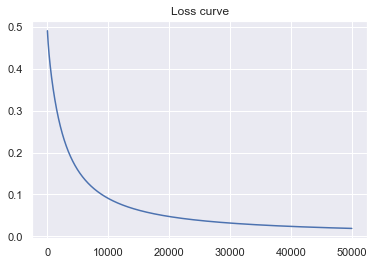

In [28]:
costs = mlp.fit(X, y_or, num_epochs=50000, learning_rate=1e-2)
plot_costs(costs)

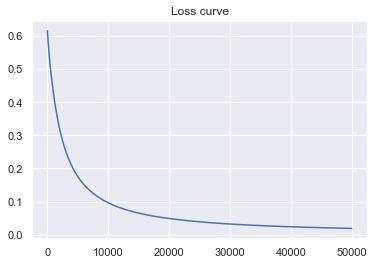

In [29]:
costs = mlp.fit(X, y_or, num_epochs=50000, learning_rate=1e-2)
plot_costs(costs)

We plot the decision boundary

Accuracy: 1.0


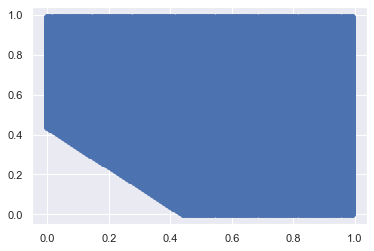

In [30]:
y_pred = mlp.predict(X) > 0.5
print("Accuracy:", accuracy_score(y_or, y_pred[0]))
plot_decision_boundary(mlp)

We can see that the or function is correctly learned. Now we visualize the decision boundary. All possible parameter combination located in the blue area would be assigned to 1 by the perceptron, all other combinations to zero. 

### AND function

Now we do the same for the AND function

In [31]:
X = np.array([[0,0],[0,1],[1,0],[1,1]]).T
y_and = np.array([0,0,0,1]).T

In [32]:
layer = Layer(nunits=1, nunits_prev=2, activ_func=Sigmoid())
mlp = MLP([layer], BinaryCrossEntropy())

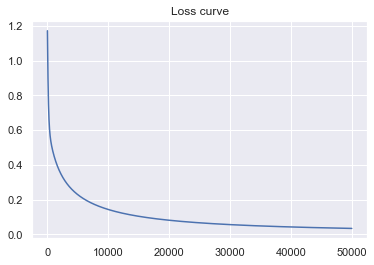

In [33]:
costs = mlp.fit(X, y_and, num_epochs=50000, learning_rate=1e-2)
plot_costs(costs)

Accuracy: 1.0


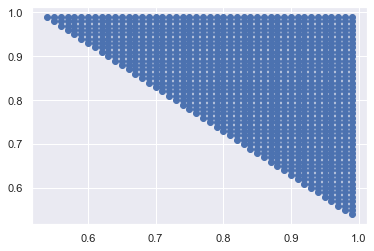

In [34]:
y_pred = mlp.predict(X) > 0.5
print("Accuracy:", accuracy_score(y_and, y_pred[0]))
plot_decision_boundary(mlp)

Let us again determine the decision boundary. You can see that the decision boundary is moved upwwards in comparison with
the OR function.

### XOR function
Finally, we try to train the exclusive or function **XOR**, which assumes the value of 1 if either of the input values are 1 but not both simultaneously. You should see that this is indeed not possible, since this function is not linearly separable. 

In [35]:
X = np.array([[0,0],[0,1],[1,0],[1,1]]).T
y_xor = np.array([0,1,1,0]).T

We fit a single-layer perceptron

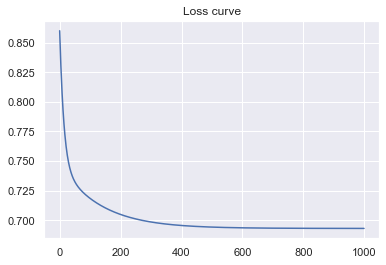

In [36]:
layer = Layer(nunits=1, nunits_prev=2, activ_func=Sigmoid())
mlp = MLP([layer], BinaryCrossEntropy())
costs = mlp.fit(X, y_xor, num_epochs=1000, learning_rate=1e-1)
plot_costs(costs)

The model seem to converge. However the loss is pretty high! Let's plot the decision boundary.

Accuracy: 0.75


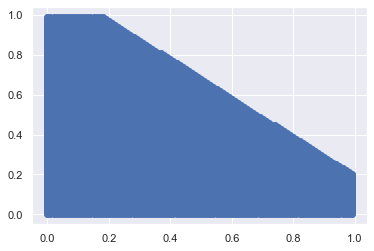

In [37]:
y_pred = mlp.predict(X) > 0.5
print("Accuracy:", accuracy_score(y_xor, y_pred[0]))
plot_decision_boundary(mlp)

This does not look correct...

Let's build a multi layer perceptron (MLP) with one hidden layer. We will use the tanh-activation function for the hidden layers.

In [38]:
input_layer = Layer(nunits=20, nunits_prev=2, activ_func=Tanh())
hidden_layer = Layer(nunits=20, nunits_prev=20, activ_func=Tanh())
output_layer = Layer(nunits=1, nunits_prev=20, activ_func=Sigmoid())
mlp = MLP([input_layer, hidden_layer, output_layer], BinaryCrossEntropy())

> Fit it to the data and display the decision boundary.

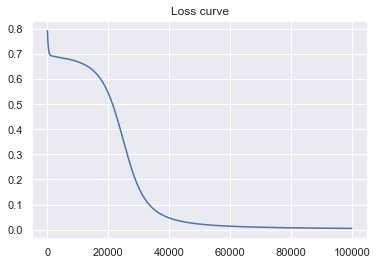

In [39]:
costs = mlp.fit(X, y_xor, num_epochs=100000, learning_rate=1e-3)
plot_costs(costs)

Accuracy: 1.0


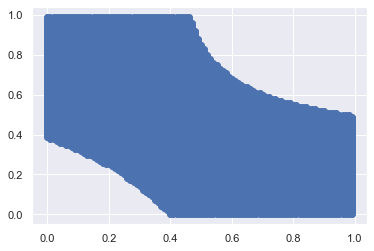

In [40]:
y_pred = mlp.predict(X) > 0.5
print("Accuracy:", accuracy_score(y_xor, y_pred[0]))
plot_decision_boundary(mlp)

This looks much better...

> Play around with the hyperparameters: for instance try more or less units or change the activation function. You can also try to make the network deeper by stacking more layers.

## Airplane classification

In [28]:
df = pd.read_csv("airplanes.csv", sep=";")
df

,mass,speed,class
0,1.0,0.1,Bomber
1,2.0,0.2,Bomber
2,0.1,0.3,Fighter
3,2.0,0.3,Bomber
4,0.2,0.4,Fighter
5,3.0,0.4,Bomber
6,0.1,0.5,Fighter
7,1.5,0.5,Bomber
8,0.5,0.6,Fighter
9,1.6,0.7,Fighter


Let's suppose we want to classify airplanes. The table above shows training
data consisting of measured masses and top speeds of known airplanes. Notice
that the data are given in unspecified units.

The aim is to construct a single layer feedforward neural network with 3 input
neurons including the bias neuron and 1 output neuron which can classify any
Bomber and Fighter.

<AxesSubplot:xlabel='mass', ylabel='speed'>

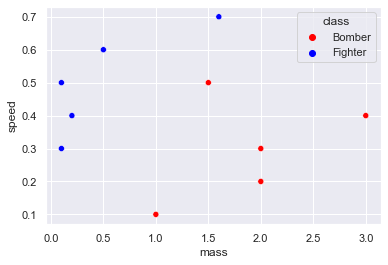

In [29]:
sns.scatterplot(x="mass", y="speed", hue="class", data=df,  palette=['red','blue'], legend='full')

> Solve this problem by either
* learning a neural net using the code we have implemented above or
* by graphically constructing a decision plane, describing it analytically and deriving from this the weights and bias of the neural net.

In [30]:
X = df[["mass", "speed"]].values.T
y = df["class"].apply(lambda x: 1 if x=="Bomber" else 0).values.reshape(-1, 1).T

In [32]:
# Construct a single layer feed forward network
layer = Layer(nunits=1, nunits_prev=2, activ_func=Sigmoid())
mlp = MLP([layer], BinaryCrossEntropy())

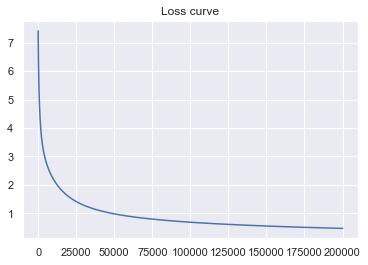

In [33]:
# Fit the network to the data
costs = mlp.fit(X, y, num_epochs=200000, learning_rate=1e-2)
plot_costs(costs)

In [34]:
# Access the weights
weights = layer.gradient_weights(layer.activations)
bias = layer.gradient_bias()
print(weights)

[[-0.01348453]]


#### Plot decision boundary
If you have constructed the weight matrix and bias (by either fitting the model or solving the problem graphically), you can use the following code to plot the decision boundary and verify your solution.

In [94]:
def lineparams(weight, bias):
    """
    Translates the weights vector and the bias into line parameters with a x2-intercept 'a' and a slope 's'.

    Parameters:
    w -- weights vector of shape (1,2)
    b -- bias (a number)
    
    Returns:
    a -- x2-intercept
    s -- slope of the line in the (x1,x2)-plane
    """
    s = 0
    if weight[0,1] != 0:
        s = -weight[0,0] / weight[0,1]

    a = -(bias / weight[0,1])
    
    return a, s

def plot_aeroplane_decision_boundary(df, X, weights, bias):
    a, s = lineparams(weights, bias)
    xs = np.linspace(X.min()-0.1, X.max()+0.1, 100)
    ys = (s * xs + a).reshape(-1)
    ax = sns.scatterplot(x="mass", y="speed", hue="class", data=df,  palette=['red','blue'], legend='full')
    ax.plot(xs, ys)

In [95]:
# verify your solution
plot_aeroplane_decision_boundary(df, X, [weights_input, weights_output], bias) 

TypeError: list indices must be integers or slices, not tuple

#### Calculate accuracy
If the model has learnt the decision boundary correctly, the accuracy should be 1.0.

In [83]:
y_pred = mlp.predict(X) > 0.5
accuracy_score(y, y_pred)

1.0

## Skin disease dataset

Now let us apply a neural network on the skin disesase data. To reduce the training time we reduce the amount of data in our dataset.

In [84]:
df = pd.read_csv("skin_disease.csv")
df = df.sample(frac=1)
df = df.iloc[0:100000]
df.head()

,class,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
381942,0,0.0,1.0,145.080902,146.886978,116.368233,0.852263,1.789740,5.468914,0.429049,-1.111748,-5.087632,1.171761,2.293956,7.656343
285452,0,0.0,1.0,146.769180,140.770966,156.528854,1.234167,1.129567,4.928933,1.465761,0.876750,-5.720662,2.065061,1.538060,7.634271
46176,0,0.0,1.0,144.793808,137.743149,116.634682,0.859864,0.766669,5.638972,-0.596336,-0.568662,4.483815,1.318225,1.086488,8.017387
182241,0,0.0,1.0,149.502670,142.475311,146.461029,1.189443,1.576754,6.324823,-0.323531,-1.057295,-3.558952,1.478133,2.090319,7.819798
184566,0,0.0,1.0,146.325409,146.044617,124.088638,1.026422,2.959136,7.670094,-0.660247,-0.854649,-3.818445,1.333956,3.501565,9.502645


In [85]:
X = df.drop(columns=["class"])
y = df["class"]

> Split the data into a train and test set. Use 40% of the data for the test set.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

We define our Multi Layer Perceptron with 2 hidden layers. This time we use the [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) implementation from Scikit-Learn.

In [88]:
mlp = MLPClassifier(alpha=0.00002, activation='tanh', max_iter=10000, 
                    hidden_layer_sizes=(30,15), batch_size=1000, tol=0.00000001)

> Train the neural network on X_train, y_train

In [89]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=2e-05, batch_size=1000,
              hidden_layer_sizes=(30, 15), max_iter=10000, tol=1e-08)

In [ ]:
mlp.fit(X_train, y_train)

We can plot the loss by accessing the attribute `loss_curve_`.

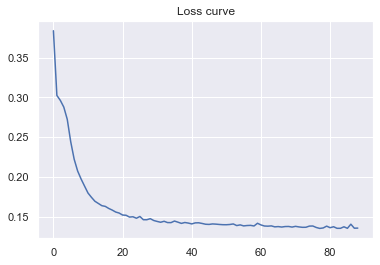

In [90]:
plot_costs(mlp.loss_curve_)

> Predict the values on the test set and calculate the accuracy and the f1-score

In [91]:
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy", accuracy)
print("F1", f1)

Accuracy 0.94605
F1 0.6939007092198581
